<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

**#ок**

Не стоит удалять комментарии после первой итерации проверки

    
</div>

In [2]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import math

In [3]:
data_calls = pd.read_csv('/datasets/calls.csv')

In [4]:
data_calls.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [6]:
data_internet = pd.read_csv('/datasets/internet.csv') 
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [7]:
data_messages = pd.read_csv('/datasets/messages.csv') 
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [8]:
data_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [9]:
data_tariffs = pd.read_csv('/datasets/tariffs.csv') 
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [10]:
data_users = pd.read_csv('/datasets/users.csv')
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [11]:
data_users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [12]:
data_users.duplicated().sum()

0

In [13]:
data_calls.duplicated().sum()

0

In [14]:
data_messages.duplicated().sum()

0

In [15]:
data_internet.duplicated().sum()

0

In [16]:
data_tariffs.duplicated().sum()

0

Дубликаты отсутсвуют

In [17]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'],format='%Y-%m-%d')

In [18]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'],format='%Y-%m-%d %H:%M:%S')

In [19]:
data_internet['mb_used'] = data_internet['mb_used'].apply(math.ceil)

In [20]:
data_internet['mb_used'].value_counts()

0       19598
333       231
382       228
377       224
334       222
        ...  
1495        1
1624        1
1371        1
1423        1
1279        1
Name: mb_used, Length: 1424, dtype: int64

In [21]:
data_calls = data_calls.query('duration > 0')

In [22]:
data_calls['duration'] = data_calls['duration'].apply(math.ceil)

In [23]:
data_calls['duration'].value_counts()

7     11510
6     11457
5     11411
8     11272
9     10973
4     10918
3     10362
10    10186
11     9385
2      9194
12     8448
1      8402
13     7486
14     6554
15     5505
16     4551
17     3671
18     2984
19     2411
20     1806
21     1304
22      975
23      720
24      468
25      363
26      257
27      151
28      104
29       56
30       39
31       30
32       17
33       10
35        5
34        3
36        2
37        2
38        2
Name: duration, dtype: int64

In [24]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'],format='%Y-%m-%d')

In [25]:
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'],format='%Y-%m-%d')

In [26]:
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'],format='%Y-%m-%d')

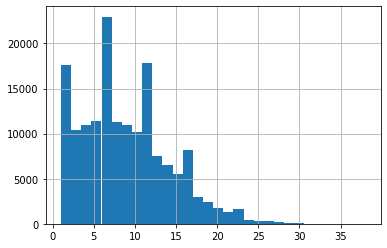

In [27]:
data_calls['duration'].hist(bins=30)

Больше всего звонков в районе 5-10 минут

In [28]:
data_calls['month'] = data_calls['call_date'].dt.month

<div style="border:solid red 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

**#ошибка**

Хорошо, то ты забыл проверку на наличие дубликатов. Дополни, пожалуйста

    
</div>

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 3**

**#ок**



+

    
</div>

In [29]:
group_calls = data_calls.pivot_table(index=['month','user_id'],values='duration',aggfunc=('sum'))

In [30]:
group_calls

duration
month user_id          
1     1005           95
      1032          380
      1045            9
      1055          551
      1071          194
...                 ...
12    1494          418
      1495         1031
      1496          518
      1497          545
      1499          492

[3168 rows x 1 columns]

In [31]:
data_messages['month'] = data_messages['message_date'].dt.month 

In [32]:
group_messages = data_messages.pivot_table(index=['month','user_id'], values='message_date', aggfunc=('count'))

In [33]:
group_messages

message_date
month user_id              
1     1005                7
      1032               38
      1045                5
      1055               30
      1071               16
...                     ...
12    1493               78
      1495               84
      1496               51
      1497               17
      1499               66

[2717 rows x 1 columns]

In [34]:
group_messages_call = group_messages.merge(group_calls, on=['user_id','month'],how='outer')

In [35]:
group_messages_call

,,message_date,duration
user_id,month,,
1005,1,7.0,95.0
1032,1,38.0,380.0
1045,1,5.0,9.0
1055,1,30.0,551.0
1071,1,16.0,194.0
...,...,...,...
1462,12,NaN,878.0
1466,12,NaN,659.0
1469,12,NaN,635.0


In [36]:
data_internet['month'] = data_internet['session_date'].dt.month

In [37]:
group_internet = data_internet.pivot_table(index=['month','user_id'], values='mb_used', aggfunc=('sum'))

In [38]:
group_internet

mb_used
month user_id         
1     1005        2730
      1032       24147
      1045        2348
      1055       17111
      1071       15622
...                ...
12    1494       17645
      1495       23450
      1496       20757
      1497       19940
      1499       13077

[3203 rows x 1 columns]

In [39]:
group_all = group_messages_call.merge(group_internet, on=['user_id','month'], how='outer')

In [40]:
data_users['month'] = data_users['reg_date'].dt.month

In [41]:
group_all = group_all.merge(data_users, on=['user_id','month'], how='inner')

In [42]:
group_all = group_all.fillna(0).sort_values(by='user_id')

Удалю ненужные столбцы

In [43]:
del group_all['age']
del group_all['churn_date']
del group_all['first_name']
del group_all['last_name']
del group_all['reg_date']

In [44]:
group_all.head()

,user_id,month,message_date,duration,mb_used,city,tariff
132,1000,5,22.0,159.0,2256.0,Краснодар,ultra
483,1001,11,0.0,430.0,18452.0,Москва,smart
167,1002,6,4.0,117.0,10871.0,Стерлитамак,smart
239,1003,8,37.0,380.0,8571.0,Москва,ultra
133,1004,5,95.0,35.0,13415.0,Новокузнецк,ultra


Создам функцию для подсчета ежемесячной выручки 

In [45]:
def profit(row):
    messages = row['message_date']
    calls = row['duration']
    internet = row['mb_used']
    tariff = row['tariff']
    
    
    if (tariff == 'smart'):
        i = 0
    else:
        i = 1
        
    left_call = data_tariffs['minutes_included'][i] - calls
    if left_call < 0:
        call_money =- left_call * data_tariffs['rub_per_minute'][i]
    else:
        call_money = 0
         
    left_internet = data_tariffs['mb_per_month_included'][i] - internet
    if left_internet < 0:
        internet_money=round((-left_internet / 1024)) * data_tariffs['rub_per_gb'][i]
    else:
        internet_money = 0
            
    left_messages = data_tariffs['messages_included'][i] - messages
    if left_messages < 0:
        messages_money =- left_messages * data_tariffs['rub_per_message'][i]
    else:
        messages_money = 0
            
    money = call_money + internet_money + messages_money + data_tariffs['rub_monthly_fee'][i]
    return money     

In [46]:
group_all['profit'] = group_all.apply(profit,axis=1)

In [47]:
group_all.head()

,user_id,month,message_date,duration,mb_used,city,tariff,profit
132,1000,5,22.0,159.0,2256.0,Краснодар,ultra,1950.0
483,1001,11,0.0,430.0,18452.0,Москва,smart,1150.0
167,1002,6,4.0,117.0,10871.0,Стерлитамак,smart,550.0
239,1003,8,37.0,380.0,8571.0,Москва,ultra,1950.0
133,1004,5,95.0,35.0,13415.0,Новокузнецк,ultra,1950.0


<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

**#ок**

Ок, выручка рассчитана верно

    
</div>

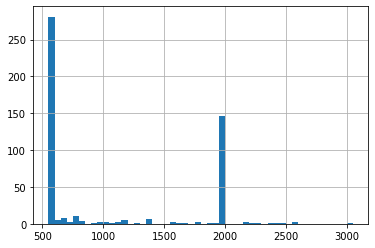

In [48]:
group_all['profit'].hist(bins=50)

In [49]:
group_all.groupby('tariff')['profit'].sum()

tariff
smart    238891.0
ultra    289950.0
Name: profit, dtype: float64

In [50]:
group_all.query('tariff == "ultra" and profit > 1950')

,user_id,month,message_date,duration,mb_used,city,tariff,profit
332,1276,10,29.0,371.0,33558.0,Москва,ultra,2400.0
371,1304,11,65.0,435.0,34924.0,Владимир,ultra,2550.0
52,1330,2,56.0,514.0,32561.0,Нижний Новгород,ultra,2250.0


In [51]:
group_all.query('tariff == "smart" and profit > 550').count()

user_id         81
month           81
message_date    81
duration        81
mb_used         81
city            81
tariff          81
profit          81
dtype: int64

Самый прибыльный тариф это `ultra`

In [52]:
count_durations = group_all.pivot_table(index='month', values='duration', aggfunc=('count'))

Посчитаю количество звонков

In [53]:
tariff_ultra = (group_all.query('tariff=="ultra"').pivot_table(index='month', values=('duration','message_date','mb_used'), aggfunc=('sum')))

tariff_smart = (group_all.query('tariff=="smart"').pivot_table(index='month', values=('duration','message_date','mb_used'), aggfunc=('sum')))

Разделил тарифы по отдельности и подсчитал сумму звонков, интернета и сообщений

In [54]:
tariff_ultra

,duration,mb_used,message_date
month,,,
1,3853.0,118382.0,304.0
2,1874.0,117389.0,181.0
3,4194.0,96432.0,146.0
4,5277.0,213294.0,412.0
5,2178.0,106700.0,332.0
6,3717.0,187364.0,501.0
7,3018.0,71624.0,261.0
8,3913.0,117213.0,583.0
9,2698.0,71849.0,238.0


In [55]:
tariff_smart

,duration,mb_used,message_date
month,,,
1,6931.0,289831.0,620.0
2,4035.0,163193.0,312.0
3,5046.0,188427.0,400.0
4,8096.0,276383.0,739.0
5,5658.0,275657.0,514.0
6,4275.0,189244.0,314.0
7,8921.0,326184.0,671.0
8,7246.0,329359.0,577.0
9,6814.0,242056.0,549.0


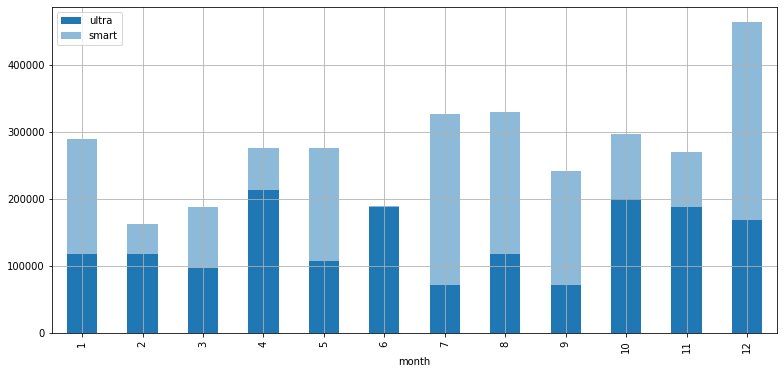

In [56]:
ax = tariff_ultra.plot(y='mb_used', figsize=(13,6), style='o-', kind='bar', label='ultra')
tariff_smart.plot(y='mb_used', grid=True, figsize=(13,6), style='o-', kind='bar', label='smart', alpha=0.5, ax=ax)

По графику видно количество потребляемого интернета по месяцам, используя 2 тарифа. `Smart` лидирует

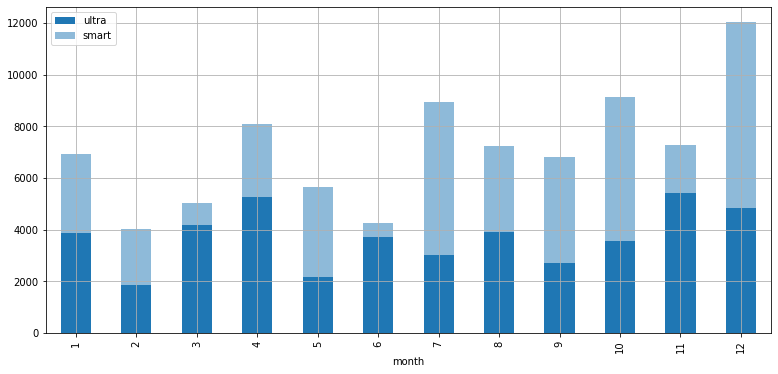

In [57]:
ax = tariff_ultra.plot(y='duration', figsize=(13,6), style='o-', kind='bar', label='ultra')
tariff_smart.plot(y='duration', grid=True, figsize=(13,6), style='o-', kind='bar', label='smart', alpha=0.5, ax=ax)

По графику видно количество звонков по месяцам, используя 2 тарифа. `Smart` лидирует

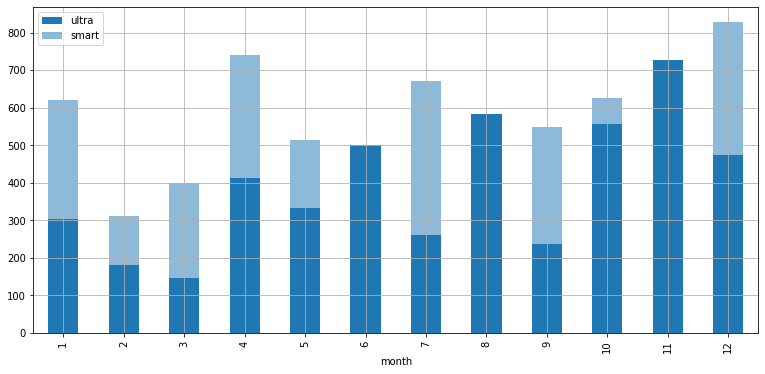

In [58]:
ax = tariff_ultra.plot(y='message_date', figsize=(13,6), style='o-', kind='bar', label='ultra')
tariff_smart.plot(y='message_date', grid=True, figsize=(13,6), style='o-', kind='bar', label='smart', alpha=0.5, ax=ax)

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

**#ок**

Хорошо, распределение по месяцам наглядно отображено

    
</div>

По графику видно количество сообщений по месяцам, используя 2 тарифа. `Ultra` начал набирать обороты

In [59]:
mean_ultra = (group_all.query('tariff=="ultra"').pivot_table(index='month', values=('duration','message_date','mb_used'), aggfunc=('mean')))

Расчет значений по `ultra`

In [60]:
mean_ultra.set_axis(['mean_duration','mean_mb_used','mean_message'], axis='columns', inplace=True)
mean_ultra

,mean_duration,mean_mb_used,mean_message
month,,,
1,428.111111,13153.555556,33.777778
2,124.933333,7825.933333,12.066667
3,322.615385,7417.846154,11.230769
4,293.166667,11849.666667,22.888889
5,181.500000,8891.666667,27.666667
6,218.647059,11021.411765,29.470588
7,431.142857,10232.000000,37.285714
8,244.562500,7325.812500,36.437500
9,299.777778,7983.222222,26.444444


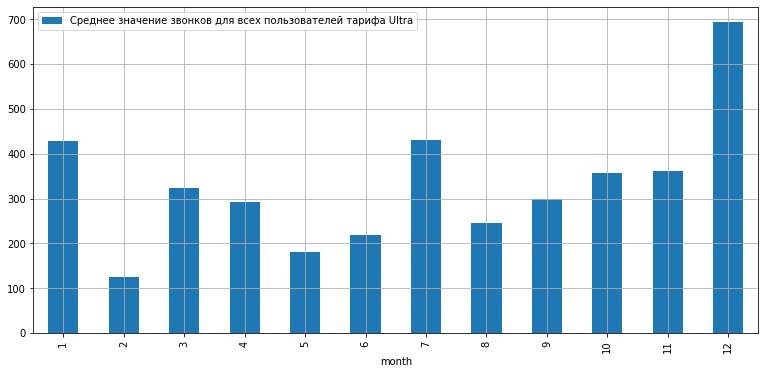

In [61]:
mean_ultra.plot(y='mean_duration', grid=True, figsize=(13,6), style='o-', kind='bar', label='Среднее значение звонков для всех пользователей тарифа Ultra')

In [62]:
mean_ultra['mean_minute_per_person'] = tariff_ultra['duration'] / len(group_all.query('tariff == "ultra"'))

Посчитал среднее значение времени разговора пользователей за каждый месяц тарифа `ultra`

In [63]:
ultra_person_calls = group_all.query('tariff=="ultra"') 
ultra_person_calls.head()

,user_id,month,message_date,duration,mb_used,city,tariff,profit
132,1000,5,22.0,159.0,2256.0,Краснодар,ultra,1950.0
239,1003,8,37.0,380.0,8571.0,Москва,ultra,1950.0
133,1004,5,95.0,35.0,13415.0,Новокузнецк,ultra,1950.0
350,1013,11,17.0,369.0,9790.0,Иваново,ultra,1950.0
351,1016,11,39.0,28.0,7388.0,Омск,ultra,1950.0


In [64]:
disp_sigma_ultra = ultra_person_calls.pivot_table(index='month', values='duration', aggfunc=(np.var))

In [65]:
disp_sigma_ultra_messages = ultra_person_calls.pivot_table(index='month', values='message_date', aggfunc=(np.var))

In [66]:
disp_sigma_ultra_internet = ultra_person_calls.pivot_table(index='month', values='mb_used', aggfunc=(np.var))

Посчитал дисперсию звонков, интернета и звонков в тарифе `Ultra`

In [67]:
disp_sigma_ultra['sigma'] = disp_sigma_ultra['duration'].apply(np.sqrt)

In [68]:
disp_sigma_ultra_messages['sigma'] = disp_sigma_ultra_messages['message_date'].apply(np.sqrt)

In [69]:
disp_sigma_ultra_internet['sigma'] = disp_sigma_ultra_internet['mb_used'].apply(np.sqrt)

Посчитал стандартное отклонение

In [70]:
disp_sigma_ultra.set_axis(['dispersion_call','sigma_call'],axis='columns',inplace=True)
disp_sigma_ultra_messages.set_axis(['dispersion_message','sigma_message'],axis='columns',inplace=True)
disp_sigma_ultra_internet.set_axis(['dispersion_internet','sigma_internet'],axis='columns',inplace=True)

Переименовал столбцы

In [71]:
disp_sigma_ultra = disp_sigma_ultra.merge(disp_sigma_ultra_messages, on='month')

In [72]:
disp_sigma_ultra = disp_sigma_ultra.merge(disp_sigma_ultra_internet, on='month')

In [73]:
mean_ultra = mean_ultra.merge(disp_sigma_ultra, on='month')

In [74]:
mean_ultra['mean_money'] = group_all.query('tariff == "ultra"').pivot_table(index='month', values='profit', aggfunc=('mean'))

In [75]:
mean_ultra['dispersion_money'] = group_all.query('tariff == "ultra"').pivot_table(index='month', values='profit', aggfunc=(np.var))

In [76]:
mean_ultra['sigma_money'] = np.sqrt(mean_ultra['dispersion_money'])

Таблица дисперсии и сигмы тарифа `ultra`

In [77]:
mean_ultra.head(10)

,mean_duration,mean_mb_used,mean_message,mean_minute_per_person,dispersion_call,sigma_call,dispersion_message,sigma_message,dispersion_internet,sigma_internet,mean_money,dispersion_money,sigma_money
month,,,,,,,,,,,,,
1,428.111111,13153.555556,33.777778,26.033784,72769.361111,269.757968,940.694444,30.670742,4.722641e+07,6872.147046,1950.0,0.0,0.000000
2,124.933333,7825.933333,12.066667,12.662162,19125.495238,138.294957,331.352381,18.203087,8.792543e+07,9376.856330,1970.0,6000.0,77.459667
3,322.615385,7417.846154,11.230769,28.337838,49596.256410,222.702170,107.858974,10.385518,3.271693e+07,5719.871369,1950.0,0.0,0.000000
4,293.166667,11849.666667,22.888889,35.655405,68667.558824,262.044956,1014.104575,31.845009,8.499787e+07,9219.428947,1950.0,0.0,0.000000
5,181.500000,8891.666667,27.666667,14.716216,40789.363636,201.963768,632.242424,25.144431,6.596449e+07,8121.852558,1950.0,0.0,0.000000
6,218.647059,11021.411765,29.470588,25.114865,35837.242647,189.307270,727.389706,26.970163,4.184689e+07,6468.917501,1950.0,0.0,0.000000
7,431.142857,10232.000000,37.285714,20.391892,98796.476190,314.319067,732.571429,27.066057,5.018871e+07,7084.398869,1950.0,0.0,0.000000
8,244.562500,7325.812500,36.437500,26.439189,56152.262500,236.964686,1126.129167,33.557848,1.987607e+07,4458.258856,1950.0,0.0,0.000000
9,299.777778,7983.222222,26.444444,18.229730,130272.444444,360.932742,761.777778,27.600322,4.733151e+07,6879.790055,1950.0,0.0,0.000000


In [78]:
mean_smart = (group_all.query('tariff == "smart"').pivot_table(index='month', values=('duration','message_date','mb_used'), aggfunc=('mean')))

In [79]:
mean_smart.set_axis(['mean_duration','mean_mb_used','mean_message'], axis='columns', inplace=True)
mean_smart

,mean_duration,mean_mb_used,mean_message
month,,,
1,203.852941,8524.441176,18.235294
2,168.125000,6799.708333,13.000000
3,265.578947,9917.210526,21.052632
4,231.314286,7896.657143,21.114286
5,195.103448,9505.413793,17.724138
6,185.869565,8228.000000,13.652174
7,241.108108,8815.783784,18.135135
8,213.117647,9687.029412,16.970588
9,262.076923,9309.846154,21.115385


Расчет средних значений по звонкам, интренету и сообщениям ежемесячно для тарифа `smart`

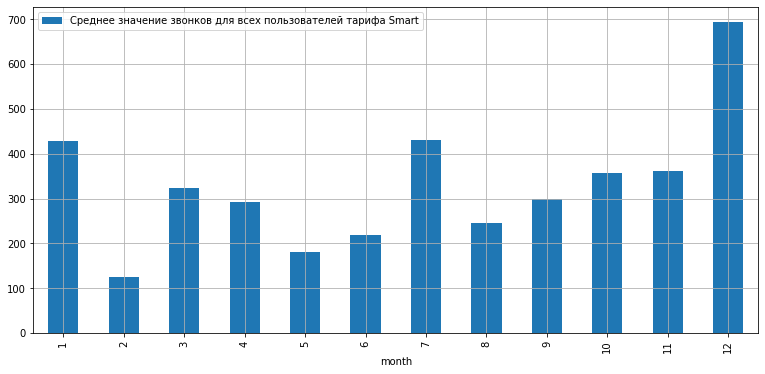

In [80]:
mean_ultra.plot(y='mean_duration', grid=True, figsize=(13,6), style='o-', kind='bar', label='Среднее значение звонков для всех пользователей тарифа Smart')

In [81]:
mean_smart['mean_minute_for_person'] = tariff_smart['duration'] / len(group_all.query('tariff == "smart"'))

Среднее время разговора для каждого месяца в тарифе `smart`

In [82]:
smart_person_calls = group_all.query('tariff == "smart"') 
smart_person_calls.head()

,user_id,month,message_date,duration,mb_used,city,tariff,profit
483,1001,11,0.0,430.0,18452.0,Москва,smart,1150.0
167,1002,6,4.0,117.0,10871.0,Стерлитамак,smart,550.0
0,1005,1,7.0,95.0,2730.0,Набережные Челны,smart,550.0
418,1006,2,0.0,42.0,1395.0,Ульяновск,smart,550.0
91,1007,4,11.0,198.0,8031.0,Москва,smart,550.0


In [83]:
smart_person_calls = group_all.query('tariff == "smart"')
smart_person_calls.head()

,user_id,month,message_date,duration,mb_used,city,tariff,profit
483,1001,11,0.0,430.0,18452.0,Москва,smart,1150.0
167,1002,6,4.0,117.0,10871.0,Стерлитамак,smart,550.0
0,1005,1,7.0,95.0,2730.0,Набережные Челны,smart,550.0
418,1006,2,0.0,42.0,1395.0,Ульяновск,smart,550.0
91,1007,4,11.0,198.0,8031.0,Москва,smart,550.0


In [84]:
disp_sigma_smart = smart_person_calls.pivot_table(index='month', values='duration', aggfunc=(np.var))

In [85]:
disp_sigma_smart_messages = smart_person_calls.pivot_table(index='month', values='message_date', aggfunc=(np.var))

In [86]:
disp_sigma_smart_internet = smart_person_calls.pivot_table(index='month', values='mb_used', aggfunc=(np.var))

Посчитал дисперсию по интернету, звонкам и сообщениям в тарифе `smart`

In [87]:
disp_sigma_smart['sigma'] = disp_sigma_smart['duration'].apply(np.sqrt)

In [88]:
disp_sigma_smart_messages['sigma'] = disp_sigma_smart_messages['message_date'].apply(np.sqrt)

In [89]:
disp_sigma_smart_internet['sigma'] = disp_sigma_smart_internet['mb_used'].apply(np.sqrt)

Посчитал стандартное отклонение по всем показателям в тарифе `smart`

In [90]:
disp_sigma_smart.set_axis(['dispersion_call','sigma_call'], axis='columns', inplace=True)
disp_sigma_smart_messages.set_axis(['dispersion_message','sigma_message'], axis='columns', inplace=True)
disp_sigma_smart_internet.set_axis(['dispersion_internet','sigma_internet'], axis='columns', inplace=True)

Переименовал столбцы

In [91]:
disp_sigma_smart = disp_sigma_smart.merge(disp_sigma_smart_messages, on='month')

In [92]:
disp_sigma_smart = disp_sigma_smart.merge(disp_sigma_smart_internet, on='month')

In [93]:
mean_smart['mean_money']  =group_all.query('tariff == "smart"').pivot_table(index='month', values='profit', aggfunc=('mean'))

In [94]:
mean_smart['dispersion_money'] = group_all.query('tariff == "smart"').pivot_table(index='month', values='profit', aggfunc=(np.var))

In [95]:
mean_smart['sigma_money'] = np.sqrt(mean_smart['dispersion_money'])

In [96]:
mean_smart = mean_smart.merge(disp_sigma_smart, on='month')

In [97]:
mean_smart.head()

,mean_duration,mean_mb_used,mean_message,mean_minute_for_person,mean_money,dispersion_money,sigma_money,dispersion_call,sigma_call,dispersion_message,sigma_message,dispersion_internet,sigma_internet
month,,,,,,,,,,,,,
1,203.852941,8524.441176,18.235294,19.802857,703.676471,192364.649733,438.593946,23787.341355,154.231454,262.367201,16.197753,4.162621e+07,6451.837940
2,168.125000,6799.708333,13.000000,11.528571,556.375000,795.375000,28.202394,18421.679348,135.726487,268.347826,16.381326,2.076865e+07,4557.263524
3,265.578947,9917.210526,21.052632,14.417143,690.052632,159090.163743,398.861083,23606.701754,153.644726,362.052632,19.027681,2.712906e+07,5208.556396
4,231.314286,7896.657143,21.114286,23.131429,572.914286,11547.315966,107.458438,21152.398319,145.438641,425.398319,20.625187,1.793742e+07,4235.258662
5,195.103448,9505.413793,17.724138,16.165714,738.310345,253887.935961,503.872936,21778.167488,147.574278,338.492611,18.398169,4.863679e+07,6974.008145


Таблица дисперсии и сигмы тарифа `smart`

### Гистограмма распределия длительности звонков пользователей `ultra`

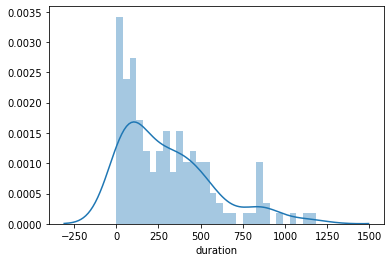

In [98]:
sns.distplot(ultra_person_calls['duration'], bins=30)

Больше всего пользователи тарифа `ultra` разговаривают около 1 минуты

### Гистограмма распределия длительности звонков пользователей `smart`

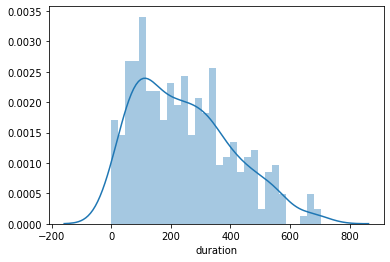

In [99]:
sns.distplot(smart_person_calls['duration'], bins=30)

Больше всего пользователи тарифа `smart` разговаривают около 100 минут

### Гистограмма распределия количества отправленных сообщений пользователей `ultra`

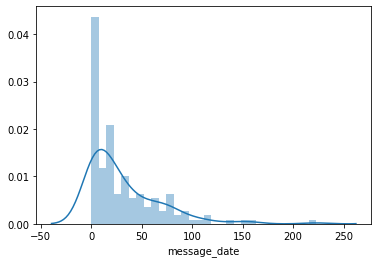

In [100]:
sns.distplot(ultra_person_calls['message_date'], bins=30)

Больше всего пользователи тарифа `ultra` отправляют около 10 смс

### Гистограмма распределия количества отправленных сообщений пользователей `smart`

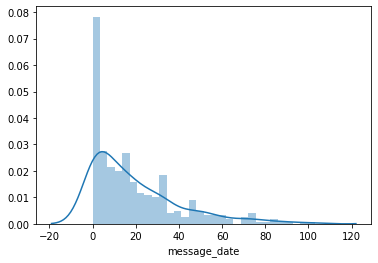

In [101]:
sns.distplot(smart_person_calls['message_date'], bins=30) 

Больше всего пользователи тарифа `smart` отправляют около 5 смс

### Гистограмма распределия количества потраченного интернета пользователей `ultra`

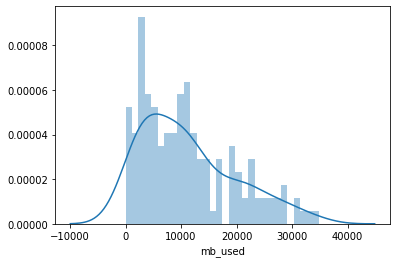

In [102]:
sns.distplot(ultra_person_calls['mb_used'], bins=30)

Больше всего пользователи тарифа `ultra` используют около 2 гб

### Гистограмма распределия количества потраченного интернета пользователей `smart`

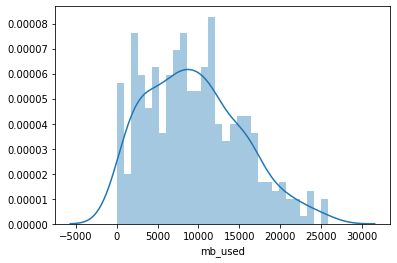

In [103]:
sns.distplot(smart_person_calls['mb_used'], bins=30)

Больше всего пользователи тарифа `smart` используют около 10 гб

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

**#ок**

Отлично построены гистограммы. Дополнительно для всех графиков стоит делсть подробные заголовки и понятные подписи осей. Тогда диаграммф и в отчетах и в презентациях удобно использовать

    
</div>

### Общая гистограмма распределения по потраченному интернету и сообщениям для тарифа `ultra`

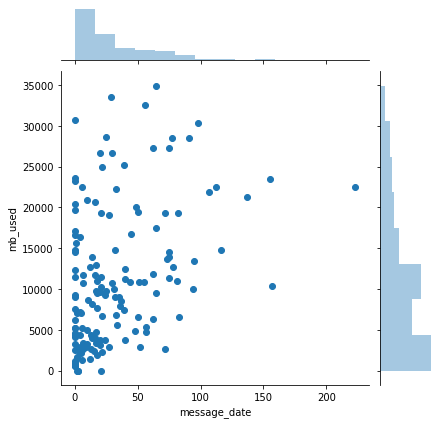

In [104]:
sns.jointplot(x='message_date', y='mb_used', data=ultra_person_calls, kind='scatter')

# Проверка гипотезы
Проверка гипотезы: средняя выручка пользователей тарифов `ultra` и `smart` различается.

Для проверки гипотез принимаем Нулевую гипотезу, что средняя выручка пользователей тарифов `ultra` и `smart` не различается (равны). Проверка гипотезы альтернативной: среднее значение выручки `ultra` меньше предполагаемого(значение `smart`)

<div style="border:solid red 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

**#ошибка**

Сформулируй, пожалуйста двухстороннюю альтернативную гипотезу. Именно ее ты проверяешь далее и это верно

    
</div>

<div style="border:solid red 2px; padding: 20px"> 
    
**Комментарий ревьюера - 3**

**#ошибка**

Альтернативная гипотеза: среднее для смарт не равно среднему для ультра
    
</div>

In [105]:
alpha = 0.05

In [106]:
ultra_all = group_all.query('tariff == "ultra"')
smart_all = group_all.query('tariff == "smart"')

In [107]:
    ultra_all['profit'].mean() # Среднее значение выречки пользователей ultra

1959.1216216216217

In [108]:
disp_ultra = np.var(ultra_all['profit'])

In [109]:
print('99% значений попадают в интервал:', round(3 * np.sqrt(disp_ultra)), 'от среднего значения', round(ultra_all['profit'].mean())) 

99% значений попадают в интервал: 197 от среднего значения 1959


Считаю доверительный 95% интервал для `ultra`

In [110]:
st.t.interval(0.95, len(ultra_all['profit'])-1, loc = np.mean(ultra_all['profit']), scale = st.sem(ultra_all['profit']))

(1948.4014506466056, 1969.8417925966378)

In [111]:
smart_all['profit'].mean() # Среднее значение выручки пользователей smart

682.5457142857143

In [112]:
disp_smart = np.var(smart_all['profit'])

In [113]:
print('99% значений попадают в интервал:',round(3*np.sqrt(disp_smart)), 'от среднего значения', round(smart_all['profit'].mean())) 

99% значений попадают в интервал: 1119 от среднего значения 683


Считаю доверительный 95% интервал для `smart`

In [114]:
st.t.interval(0.95, len(smart_all['profit'])-1, loc = np.mean(smart_all['profit']), scale = st.sem(smart_all['profit']))

(643.2622977282227, 721.8291308432059)

In [115]:
smart_all['profit'].var() #Дисперсия выручки smart

139628.145468686

In [116]:
ultra_all['profit'].var() #Дисперсия выручки ultra

4355.005515719801

In [117]:
result = st.ttest_ind(smart_all['profit'], ultra_all['profit'], equal_var=False) 

In [118]:
result.pvalue

1.4491547536423871e-205

In [119]:
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилость отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


Для проверки гипотез принимаем Нулевую гипотезу, что средняя выручка пользователей тарифов `ultra` и `smart` не различается.

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

**#ок**

Вот до этого места все правильно. Ты верно проверил двухстороннюю гипотезу

    
</div>

Нулевая гипотеза отвергнута. Значения средней выручки тарифа `ultra` и тарифа `smart` различаются. Проверка гипотезы альтернативной: среднее значение выручки Ультра меньше предполагаемого

<div style="border:solid red 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

**#ошибка**

А вот этой части делать не нужно.

    
</div>

Проверка гипотезы: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Нулевая гипотеза звучит так: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

<div style="border:solid red 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

**#ошибка**

Здесь также надо сформулировать двухстороннюю альтернативу
    
</div>

<div style="border:solid red 2px; padding: 20px"> 
    
**Комментарий ревьюера - 3**

**#ошибка**

Сформулируй альтернативную гипотезу
    
</div>

In [120]:
moscow_all = group_all.query('city == "Москва"')
other_all = group_all.query('city != "Москва"')

In [121]:
alpha=0.05

In [122]:
moscow_all['profit'].var()

440427.66749123886

In [123]:
moscow_all['profit'].mean()

1083.8383838383838

In [124]:
other_all['profit'].var()

441353.15511139657

In [125]:
other_all['profit'].mean()

1056.4937343358397

In [126]:
result = st.ttest_ind(moscow_all['profit'], other_all['profit'])

In [127]:
result.pvalue

0.7140321117359004

In [128]:
if (result.pvalue<alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилость отвергнуть нулевую гипотезу')

Не получилость отвергнуть нулевую гипотезу


Гипотезу не отвергаем. Средняя выручка в Москве отличается от средней выручки в регионах.

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 4**

**#ок**
    
Гипотезу не можем отвергнуть, а значит у нас нет оснований считать, что выручка в Москве отличается от выручки в регионах

</div>

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

**#ок**
    
+

</div>

<div style="border:solid red 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

**#ошибка**

Здесь ты сам себе противоречишь.
    
</div>

<div style="border:solid red 2px; padding: 20px"> 
    
**Комментарий ревьюера - 3**
    

**#ошибка**

Посмотри, что должно произойти при result.pvalue<alpha
                                                       
Постарайся поточнее понять тему проверки гипотез. Она будет теперь в каждом проекте, ее надо усвоить                                                    
    
</div>

Самый популярный тариф оказался `smart`. Но самый прибылный тариф - `ultra`. Доверительный интервал прибыли для тарифа `ultra`  составляет 1948-1969 руб, а для тарифа `smart` 642-720 руб.